In [49]:
## Amits Project 1 - Netflix Data 
## Average Number of Show Seasons / movie duration for Top 10 Countries (Across Movies & TV Shows)

In [50]:
# Dependencies and Setup

import os
print(os.getcwd())
import random
import matplotlib.pyplot as plt
import numpy as np

/Users/amitsuresh/Downloads/UC Berkeley Data Analytics Bootcamp/Project 1/Project_1


In [51]:
# import csv
# !pip install pandas
import pandas as pd
import os
#File to Load 
df = pd.read_csv('netflix_titles.csv')

In [52]:
## all data is viewable

#pd.set_option("display.max_rows", None)
    ## but using this causes server errors

In [53]:
# Load data from CSV file into a DataFrame
cleaned_data = pd.read_csv('netflix_titles.csv')

# by rating
cleaned_data.groupby('rating').size().sort_values(ascending=False)
cleaned_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [54]:
cleaned_data[["type"]].value_counts()

type   
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [55]:
shows = cleaned_data[cleaned_data["type"] == "TV Show"]
shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [56]:
# Load data from CSV file into a DataFrame
# by show id (seasons)
cleaned_data.groupby('show_id').size().sort_values(ascending=False)

# seasons = cleaned_data.shape[0]
# seasons

show_id
s1       1
s6286    1
s6280    1
s6281    1
s6282    1
        ..
s3636    1
s3635    1
s3634    1
s3633    1
s999     1
Length: 8807, dtype: int64

In [57]:
# Load data from CSV file into a DataFrame
# cleaned_data = pd.read_csv('netflix_titles.csv')

## by type (tv or film)
cleaned_data.groupby('type').size().sort_values(ascending=False)
cleaned_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [58]:
##
# Check if the file exists
if os.path.exists('netflix_titles.csv'):
    # Read the CSV file into a DataFrame
    df = pd.read_csv('netflix_titles.csv')
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print("File 'netflix_titles.csv' does not exist.")

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [59]:
df['show_id']

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object

In [60]:
# Group the data by each category & count the number of films for each combination
grouped_data = df.groupby(['country', 'title', 'type', 'date_added', 'show_id', 'director', 'cast', 'release_year', 
                           'rating', 'duration', 'listed_in', 'description'])
film_count_by_country = grouped_data.size()
print(film_count_by_country)

country            title                        type   date_added          show_id  director             cast                                                                                                                                                                                                release_year  rating  duration  listed_in                                              description                                                                                                                                             
, France, Algeria  Eyes of a Thief              Movie  July 30, 2021       s366     Najwa Najjar         Khaled Abol El Naga, Souad Massi, Suhail Haddad, Malak Ermileh, Maisa Abd Elhadi, Walid Abdul Salam, Nisreen Faour, Areen Omari                                                                     2014          TV-14   103 min   Dramas, Independent Movies, International Movies       After a decade in prison, a Palestinian man with a dark secret returns 

In [61]:
# How many productions are occurring outside the US? 
productions_outside_US = df[df['country'] != 'United States'].shape[0]
print("Number of productions happening outside of the US:", productions_outside_US)

# Group the data by country, title, and type, and count the number of films for each combination
grouped_data = df.groupby(['country', 'title', 'type'])
film_count_by_country = grouped_data.size()
print(film_count_by_country)

Number of productions happening outside of the US: 5989
country            title                                          type   
, France, Algeria  Eyes of a Thief                                Movie      1
, South Korea      D.P.                                           TV Show    1
Argentina          27, el club de los malditos                    Movie      1
                   A Life of Speed: The Juan Manuel Fangio Story  Movie      1
                   Abzurdah                                       Movie      1
                                                                            ..
Vietnam            Furie                                          Movie      1
                   Jackpot                                        Movie      1
                   Sky Tour: The Movie                            Movie      1
West Germany       Hitler - A Career                              Movie      1
Zimbabwe           Cook Off                                       Movie      1
L

In [62]:
len(cleaned_data)

8807

In [63]:
# how many movies/tv shows are attached to how many countries
cleaned_data = pd.read_csv('netflix_titles.csv')

cleaned_data['country'].str.split(', ').str.len().value_counts()

# how many countries
countries_df=cleaned_data['country'].str.get_dummies(', ')
countries=list(countries_df.columns)

cleaned_data['num_countries']=countries_df.sum(axis=1)
cleaned_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_countries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",6
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1


In [64]:
# movie only
Movie_df= cleaned_data[cleaned_data['type'] == 'Movie']
Movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_countries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",6
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1


In [65]:
# release date in order
cleaned_data = pd.read_csv('netflix_titles.csv')
cleaned_data['release_year'] = pd.to_datetime(cleaned_data['release_year'])
cleaned_data['release_year'] = cleaned_data['release_year'].dt.year
# release_year_counts = cleaned_data.groupby('release_year').size()
# release_year_counts_sorted = release_year_counts.sort_index()
# print(release_year_counts_sorted)
sorted_data = cleaned_data.sort_values(by='release_year')
print(sorted_data[['title', 'release_year']])

                                  title  release_year
0                  Dick Johnson Is Dead          1970
5879                   The Ridiculous 6          1970
5878  Mike Epps: Don't Take It Personal          1970
5877                         Sammy & Co          1970
5876       Marco Polo: One Hundred Eyes          1970
...                                 ...           ...
2936                              Azali          1970
2937             Dragons: Rescue Riders          1970
2938                  Fifty: The Series          1970
2932                          Fronteras          1970
8806                             Zubaan          1970

[8807 rows x 2 columns]


In [66]:
# # define categories
# category_df = cleaned_data[['show_id', 'type', 'title', 'director', 'cast', 'country']]
# category_df = category_df.sum()

category_counts = cleaned_data[['show_id', 'type', 'title', 'director', 'cast', 'country']].value_counts()
category_counts

show_id  type   title                director                  cast                                                                                                                                                                                            country                                               
s10      Movie  The Starling         Theodore Melfi            Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor                          United States                                             1
s6549    Movie  Dad                  Gary David Goldberg       Jack Lemmon, Ted Danson, Olympia Dukakis, Kathy Baker, Kevin Spacey, Ethan Hawke, Zakes Mokae, J.T. Walsh, Peter Michael Goetz, John Apicella, Richard McGonagle, Bill Morey, Mary Fogarty      United States                                             1
s6547    Movie  Daagdi Chaawl        Chandrakant Kanse      

In [67]:
# movies & tv shows produced in countries by size. (top 25)
cleaned_data.groupby('country').size().sort_values(ascending=False).head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
dtype: int64

In [68]:
# Just USA data
us_movies_and_tv = cleaned_data[cleaned_data['country'] == 'United States']
us_movies_and_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",1970,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",1970,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",1970,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",1970,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",1970,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",1970,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",1970,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",1970,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",1970,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [69]:
# Only movies
movie_data = cleaned_data[cleaned_data['type'] == 'Movie']
movie_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",1970,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",1970,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1970,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",1970,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",1970,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",1970,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",1970,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",1970,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",1970,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [70]:
# Only TV shows
tvshow_data = cleaned_data[cleaned_data['type'] == 'TV Show']
tvshow_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",1970,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",1970,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",1970,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",1970,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",1970,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",1970,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [71]:
# breaking down the genres
categories_df=cleaned_data['listed_in'].str.get_dummies(', ')
categories=list(categories_df.columns)
display(len(categories))
cleaned_data[categories]=categories_df
cleaned_data['num_categories']=categories_df.sum(axis=1)
cleaned_data.head(5)

42

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",1970,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",1970,TV-MA,2 Seasons,...,0,1,0,1,0,0,0,0,0,3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",1970,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,3
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",1970,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,2
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1970,TV-MA,2 Seasons,...,1,0,0,0,0,0,0,0,0,3


In [72]:
newt=cleaned_data.groupby('country').size().sort_values(ascending=False).head(10)
newt

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
dtype: int64

In [73]:
## IGNORE
# Movie & tv shows produced in countries by size. Top 10.

# newt = newt.index.tolist()
# cleaned_data[cleaned_data['country'].isin(newt)]

#country_US = cleaned_data.loc[cleaned_data['country'] == 'United States']
#country_India = cleaned_data.loc[cleaned_data['country'] == 'India']
#country_United_Kingdom = cleaned_data.loc[cleaned_data['country'] == 'United_Kingdom']
#country_Japan = cleaned_data.loc[cleaned_data['country'] == 'Japan']


# country_US
# country_India


## doesn't work
# country_India = cleaned_data.groupby('country')['India']
# country_United_Kingdom = cleaned_data.groupby('country')['United Kingdom']
# country_Japan = cleaned_data.groupby('country')['Japan']
# country_South_Korea = cleaned_data.groupby('country')['South Korea']
# country_Canada = cleaned_data.groupby('country')['Canada']
# country_Spain = cleaned_data.groupby('country')['Spain']
# country_France = cleaned_data.groupby('country')['France']
# country_Mexico = cleaned_data.groupby('country')['Mexico']
# country_Egypt = cleaned_data.groupby('country')['Egypt']

# Assemble the resulting series into a single summary dataframe
# country_df = pd.dataframe({'United States': country_us,
#                          'India': country_India,
#                          'United Kingdom': country_United_Kingdom
# })


In [74]:
newt_list = newt.index.to_list()
newt_list

['United States',
 'India',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Canada',
 'Spain',
 'France',
 'Mexico',
 'Egypt']

In [75]:
# 749 countries shown or are repeated
len(cleaned_data["country"].unique())

749

In [76]:
cleaned_data["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [77]:
newt_countries = cleaned_data[cleaned_data["country"].isin(newt_list)]
newt_countries["country"].unique()

array(['United States', 'India', 'United Kingdom', 'Mexico', 'Japan',
       'France', 'South Korea', 'Spain', 'Canada', 'Egypt'], dtype=object)

In [78]:
newt_countries.country.value_counts()

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [79]:
total_data = len(cleaned_data)
total_data

8807

In [80]:
# Miscellaneous
# amount of ratings for each
cleaned_data["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [81]:
# Miscellaneous
# rating percentage in order
round(((cleaned_data["rating"].value_counts())/total_data) * 100,2)

rating
TV-MA       36.41
TV-14       24.53
TV-PG        9.80
R            9.07
PG-13        5.56
TV-Y7        3.79
TV-Y         3.49
PG           3.26
TV-G         2.50
NR           0.91
G            0.47
TV-Y7-FV     0.07
NC-17        0.03
UR           0.03
74 min       0.01
84 min       0.01
66 min       0.01
Name: count, dtype: float64

In [82]:
# length of movie or show
cleaned_data["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [83]:
# length of movie or show in percent
round(((cleaned_data["duration"].value_counts())/total_data) * 100,2)

duration
1 Season     20.36
2 Seasons     4.83
3 Seasons     2.26
90 min        1.73
94 min        1.66
             ...  
16 min        0.01
186 min       0.01
193 min       0.01
189 min       0.01
191 min       0.01
Name: count, Length: 220, dtype: float64

In [84]:
# Average number of tv show seasons
grouped_data = cleaned_data.groupby('title').agg({'duration': lambda x: int(x.split()[0]) if 'Season' in x else 1})
average_seasons = grouped_data['duration'].mean()
print("Average number of seasons per TV show:", average_seasons)

Average number of seasons per TV show: 1.0


In [85]:
# Top countries producing TV Shows
countries_producing_shows = cleaned_data[cleaned_data['type'] == 'TV Show']['country'].dropna()
country_counts = countries_producing_shows.value_counts()
sorted_country_counts = country_counts.sort_values(ascending=False)
print("Top countries producing TV shows:")
print(sorted_country_counts.head(10))

Top countries producing TV shows:
country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          48
Name: count, dtype: int64


Top 10 countries producing TV shows:
country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          48
Name: count, dtype: int64


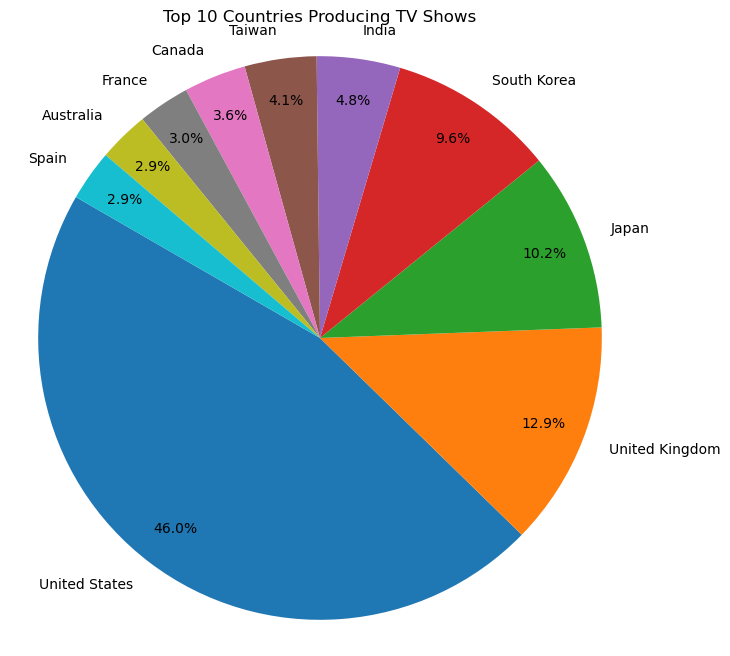

In [86]:
# Top 10 countries producing TV shows data:
countries_producing_shows = cleaned_data[cleaned_data['type'] == 'TV Show']['country'].dropna()
country_counts = countries_producing_shows.value_counts()
sorted_country_counts = country_counts.sort_values(ascending=False)
print("Top 10 countries producing TV shows:")
print(sorted_country_counts.head(10))

# Pie chart for tv:
countries_producing_shows = cleaned_data[cleaned_data['type'] == 'TV Show']['country'].dropna()
country_counts = countries_producing_shows.value_counts()
top_countries = country_counts.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=150, pctdistance=0.85)
plt.axis('equal')
plt.title('Top 10 Countries Producing TV Shows')
plt.show()

In [87]:
# Top countries producing movies
countries_producing_movies = cleaned_data[cleaned_data['type'] == 'Movie']['country'].dropna()
country_counts = countries_producing_movies.value_counts()
sorted_country_counts = country_counts.sort_values(ascending=False)
print("Top countries producing movies:")
print(sorted_country_counts.head(10))

Top countries producing movies:
country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64


Top 10 countries producing movies:
country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64


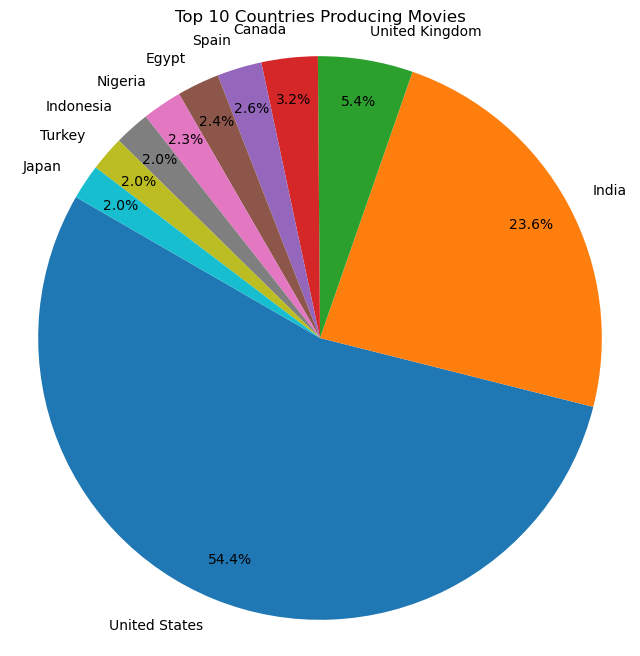

In [88]:
# Top 10 countries producing movies data:
countries_producing_movies = cleaned_data[cleaned_data['type'] == 'Movie']['country'].dropna()
country_counts = countries_producing_movies.value_counts()
sorted_country_counts = country_counts.sort_values(ascending=False)
print("Top 10 countries producing movies:")
print(sorted_country_counts.head(10))

# Pie chart for movies:
countries_producing_shows = cleaned_data[cleaned_data['type'] == 'Movie']['country'].dropna()
country_counts = countries_producing_shows.value_counts()
top_countries = country_counts.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=150, pctdistance=0.85)
plt.axis('equal')
plt.title('Top 10 Countries Producing Movies')
plt.show()

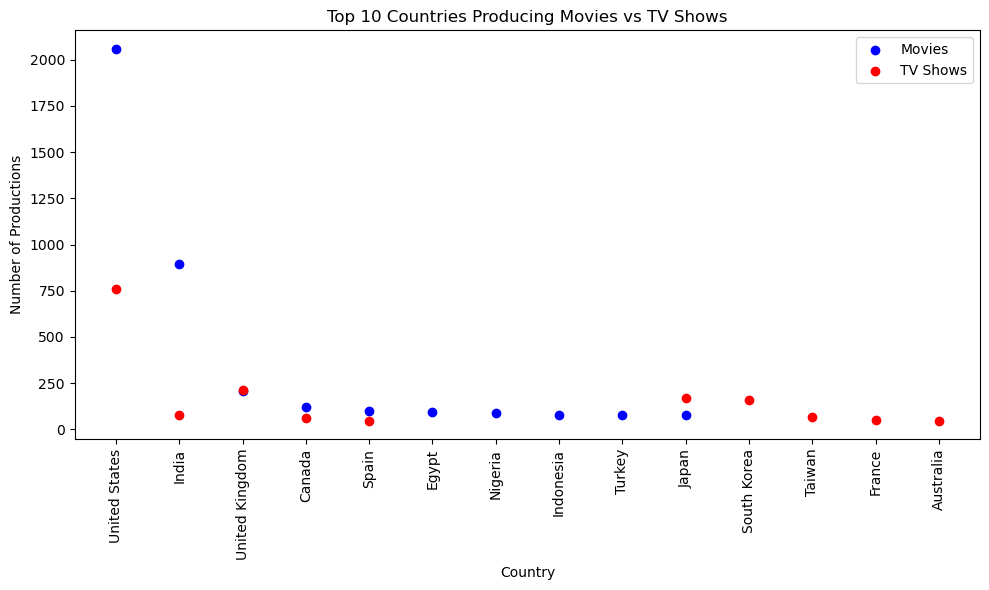

In [89]:
## Scatter plot of comparison between film and tv show
movies_data = cleaned_data[cleaned_data['type'] == 'Movie']
movies_countries = movies_data['country'].dropna()
movies_country_counts = movies_countries.value_counts().head(10)

tv_shows_data = cleaned_data[cleaned_data['type'] == 'TV Show']
tv_shows_countries = tv_shows_data['country'].dropna()
tv_shows_country_counts = tv_shows_countries.value_counts().head(10)

movies_x = movies_country_counts.index
movies_y = movies_country_counts.values

tv_shows_x = tv_shows_country_counts.index
tv_shows_y = tv_shows_country_counts.values

plt.figure(figsize=(10, 6))
plt.scatter(movies_x, movies_y, color='blue', label='Movies')
plt.scatter(tv_shows_x, tv_shows_y, color='red', label='TV Shows')

plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.title('Top 10 Countries Producing Movies vs TV Shows')
plt.xticks(rotation=90) 
plt.legend()

plt.tight_layout()
plt.show()

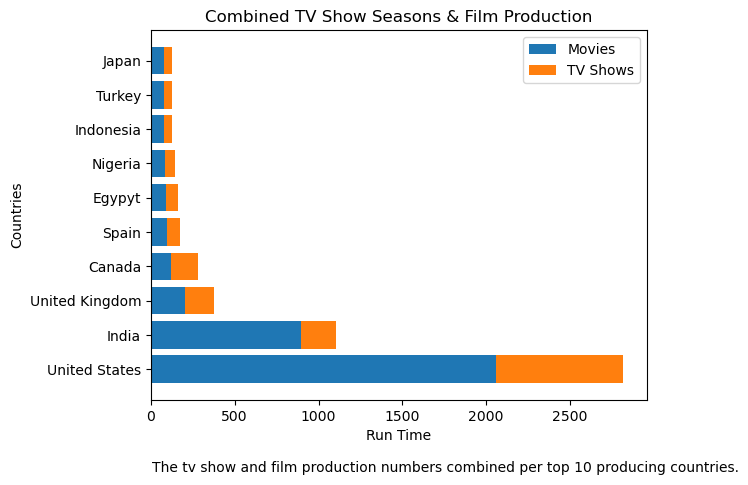

In [90]:
## The show and film production numbers combined per top 10 country
## Not using this chart

## Horizontal bar chart
categories = ['United States', 'India', 'United Kingdom', 'Canada', 'Spain', 'Egypyt', 
              'Nigeria', 'Indonesia', 'Turkey', 'Japan']
values1_movie = [2058, 893, 206 ,122 ,97 ,92 ,86, 77, 76, 76]
values2_tvshow = [760, 213, 169, 158, 79, 68, 59, 49, 48, 48]
fig, ax = plt.subplots()
ax.barh(categories, values1_movie, label='Movies')
ax.barh(categories, values2_tvshow, left=values1_movie, label='TV Shows')

ax.set_ylabel('Countries')
ax.set_xlabel('Run Time')
ax.set_title('Combined TV Show Seasons & Film Production')
ax.legend()

## Analysis label
plt.text(5, -3.0, "The tv show and film production numbers combined per top 10 producing countries.", ha='left')

plt.show()

In [91]:
#movies_data['country']
movies_data['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

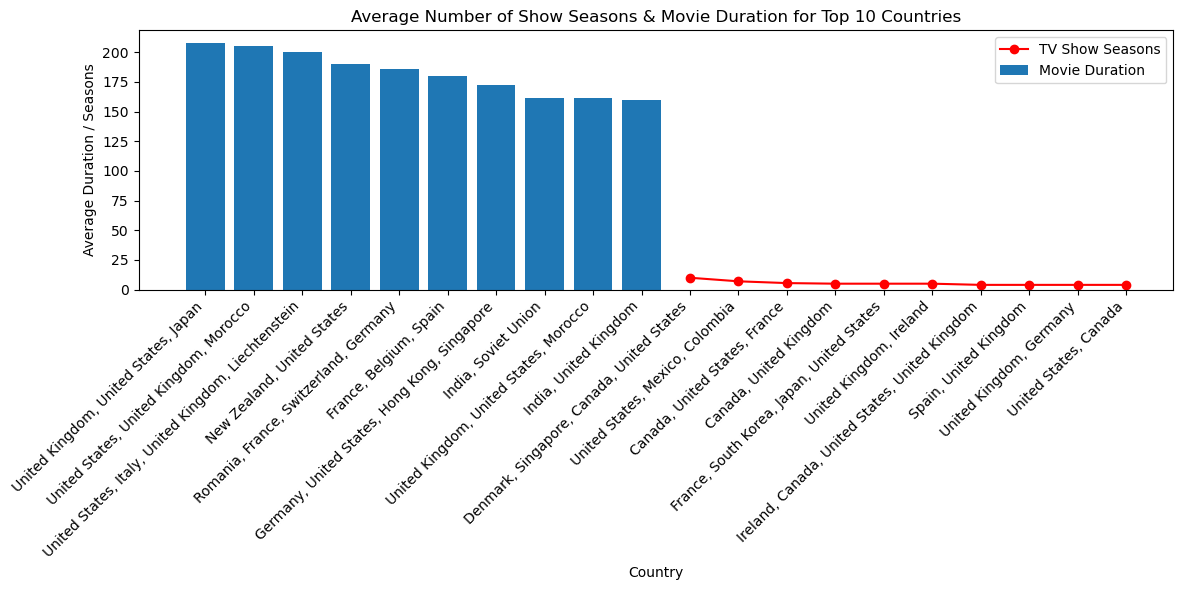

In [92]:
# Average Number of Show Seasons / movie duration for Top 10 Countries (Across Movies & TV Shows)
# Country names overlap at the bottom with this code, error fixed!

exact_data = cleaned_data[['country', 'type', 'duration']]

exact_data = exact_data.dropna(subset=['country'])

exact_data = exact_data.dropna(subset=['duration'])

exact_data['duration'] = exact_data['duration'].apply(lambda x: int(x.split()[0]))

grouped_data = exact_data.groupby(['country', 'type']).mean().reset_index()

# movies and TV shows separated
movies_data = grouped_data[grouped_data['type'] == 'Movie'].nlargest(10, 'duration')
tv_shows_data = grouped_data[grouped_data['type'] == 'TV Show'].nlargest(10, 'duration')

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(movies_data['country'], movies_data['duration'], label='Movie Duration')
ax.plot(tv_shows_data['country'], tv_shows_data['duration'], marker='o', color='red', label='TV Show Seasons')

# labels
ax.set_xlabel('Country')
ax.set_ylabel('Average Duration / Seasons')
ax.set_title('Average Number of Show Seasons & Movie Duration for Top 10 Countries')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [93]:
# Most frequently occuring genres movie/tv
cleaned_data.groupby('listed_in').size().sort_values(ascending=False)

listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Cult Movies, Dramas, International Movies                       1
Cult Movies, Dramas, Music & Musicals                           1
Cult Movies, Dramas, Thrillers                                  1
Cult Movies, Horror Movies, Thrillers                           1
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy      1
Length: 514, dtype: int64

In [94]:
# top recurring tv show genres
df.dropna(subset=['listed_in'], inplace=True)

tv_shows_genres = df[df['type'] == 'TV Show']

genre_counts = tv_shows_genres['listed_in'].value_counts()

print("Top TV Show Genres:")
print(genre_counts.head(10))

Top TV Show Genres:
listed_in
Kids' TV                                                  220
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      99
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       88
Docuseries                                                 85
TV Comedies                                                69
Name: count, dtype: int64


In [95]:
# top recurring movie genres
df.dropna(subset=['listed_in'], inplace=True)

movie_genres = df[df['type'] == 'Movie']

genre_counts = movie_genres['listed_in'].value_counts()

print("Top Movie Genres:")
print(genre_counts.head(10))

Top Movie Genres:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: count, dtype: int64


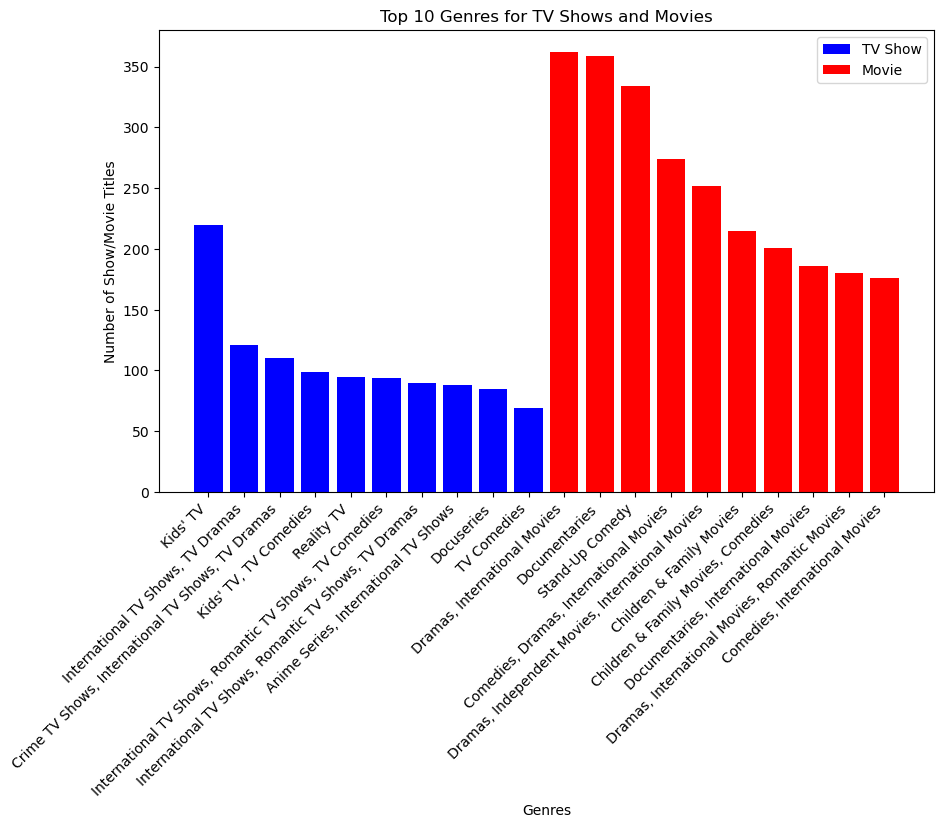

In [96]:
# graph of top 10 genres for movies and tv shows
fig, ax = plt.subplots(figsize=(10, 6))

# data for TV shows and movies
tv_shows = cleaned_data[cleaned_data['type'] == 'TV Show']
movies = cleaned_data[cleaned_data['type'] == 'Movie']

# calculated genre counts for TV shows
tv_show_genres = tv_shows['listed_in'].value_counts().head(10)
ax.bar(tv_show_genres.index.astype(str), tv_show_genres.values, color='blue', label='TV Show')

# calculated genre counts for movies
movie_genres = movies['listed_in'].value_counts().head(10)
ax.bar(movie_genres.index.astype(str), movie_genres.values, color='red', label='Movie')

# labels & title
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Show/Movie Titles')
ax.set_title('Top 10 Genres for TV Shows and Movies')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.show()